Um problema de classificação de padrões consiste em associar um
padrão de entrada (amostra, exemplo, instância) para uma das classes previamente conhecidas.
Portanto, este é um problema de aprendizado supervisionado, pois já sabemos qual a resposta que o classificador precisa fornecer.
Desenvolver um sistema de classificação fuzzy para a resolução do
problema de classificação Iris Plants. Para isso, siga os seguintes passos:

1. Construa a base de regras utilizando o algoritmo de Wang-Mendel. As regras serão construídas usando os dados de treinamento.

2. Calcule o peso das regras utilizando a proposta de Hisao Ishibuchi, Ken Nozaki e Hideo Tanaka (1992)ii.

3. Classifique, utilizando os dados de teste, com os métodos de Raciocínio Fuzzy Clássico e Geral.

In [1]:
pip install scikit-fuzzy

     |████████████████████████████████| 1.0MB 27.2MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp37-none-any.whl size=894088 sha256=8d2254870eb26a06e38daab779465d8eee86d5c7c5e552a58cfd552d11a5afbd
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


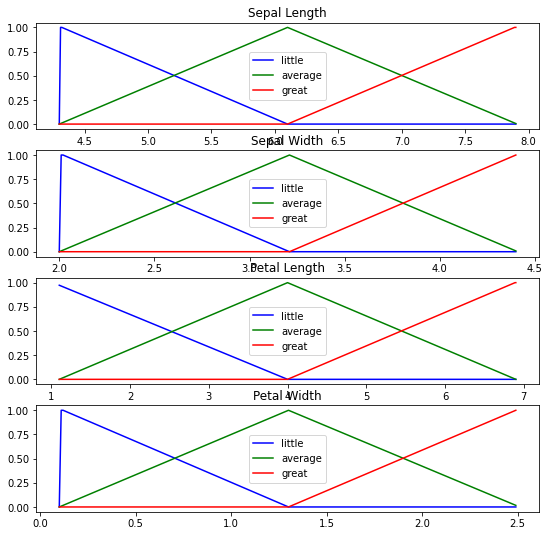

In [2]:
#importo todas as bibliotecas 
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import pandas as pd

#ler arquivo de amostras para matriz
def ler_arquivo(arq):  
  iris_line = []
  iris_mat=[]
  iris_line= arq.readlines() 
  for i in range(len(iris_line)):
    iris_mat.append(iris_line[i].split(',')) 
  arq.close()
  iris_matt=np.zeros((len(iris_line),5), dtype=np.float64)
  for i in range(0,len(iris_line)):
    for j in range (0,5):
      iris_matt[i][j]=float(iris_mat[i][j]) 
  return iris_matt

#### gerar a matriz de regras sem peso ######
def mat_regras(iris_matt):
  iris_pert=np.zeros((len(iris_matt),5), dtype=np.float64)
  for i in range (0,len(iris_matt)):
    sepal_l_l=fuzz.interp_membership(sepal_length,sepal_length_little,iris_matt[i][0])
    sepal_l_av=fuzz.interp_membership(sepal_length,sepal_length_average,iris_matt[i][0])
    sepal_l_gr=fuzz.interp_membership(sepal_length,sepal_length_great,iris_matt[i][0])
    sepal_w_l=fuzz.interp_membership(sepal_width,sepal_width_little, iris_matt[i][1])
    sepal_w_av=fuzz.interp_membership(sepal_width,sepal_width_average, iris_matt[i][1])
    sepal_w_gr=fuzz.interp_membership(sepal_width,sepal_width_great, iris_matt[i][1])
    petal_l_l=fuzz.interp_membership(petal_length,petal_length_little,iris_matt[i][2])
    petal_l_av=fuzz.interp_membership(petal_length,petal_length_average,iris_matt[i][2])
    petal_l_gr=fuzz.interp_membership(petal_length,petal_length_great,iris_matt[i][2])
    petal_w_l=fuzz.interp_membership(petal_width,petal_width_little,iris_matt[i][3])
    petal_w_av=fuzz.interp_membership(petal_width,petal_width_average,iris_matt[i][3])
    petal_w_gr=fuzz.interp_membership(petal_width,petal_width_great,iris_matt[i][3])

    if sepal_l_l > sepal_l_av and sepal_l_l > sepal_l_gr:
      s_l=0
    if sepal_l_av > sepal_l_l and sepal_l_av > sepal_l_gr:
      s_l=1
    if sepal_l_gr > sepal_l_l and sepal_l_gr > sepal_l_av:
      s_l=2

    if sepal_w_l > sepal_w_av and sepal_w_l > sepal_w_gr:
      s_w=0
    if sepal_w_av > sepal_w_l and sepal_w_av > sepal_w_gr:
      s_w=1
    if sepal_w_gr > sepal_w_l and sepal_w_gr > sepal_w_av:
      s_w=2

    if petal_l_l > petal_l_av and petal_l_l > petal_l_gr:
      p_l=0
    if petal_l_av > petal_l_l and petal_l_av > petal_l_gr:
      p_l=1
    if petal_l_gr > petal_l_l and petal_l_gr > petal_l_av:
      p_l=2

    if petal_w_l > petal_w_av and petal_w_l > petal_w_gr:
      p_w=0
    if petal_w_av > petal_w_l and petal_w_av > petal_w_gr:
      p_w=1
    if petal_w_gr > petal_w_l and petal_w_gr > petal_w_av:
      p_w=2

    iris_pert[i,0]=s_l
    iris_pert[i,1]=s_w
    iris_pert[i,2]=p_l
    iris_pert[i,3]=p_w
    iris_pert[i,4]=iris_matt[i][4]

  iris_pert_p=pd.DataFrame(iris_pert)
  iris_pert_p_n=iris_pert_p.drop_duplicates()

  return iris_pert_p_n

#aplicando peso nas regras
def mat_regras_peso(iris_pert_p_n,iris_matt):
  iris_r_p=np.zeros((len(iris_pert_p_n),6), dtype=np.float64)
  for i in range (0,len(iris_pert_p_n)): #para cada regra
    b_max=0; b_soma=0; beta=0; cf=0;
    soma_0=0; soma_1=0; soma_2=0;
    for j in range (0,len(iris_matt)): #vejo todas as amostras
      s_l=0;s_w=0;p_l=0;p_w=0;

      if iris_pert_p_n[0].iloc[i]==0:
        s_l=fuzz.interp_membership(sepal_length,sepal_length_little,iris_matt[j][0])
      if iris_pert_p_n[0].iloc[i]==1:
        s_l=fuzz.interp_membership(sepal_length,sepal_length_average,iris_matt[j][0])
      if iris_pert_p_n[0].iloc[i]==2:
        s_l=fuzz.interp_membership(sepal_length,sepal_length_great,iris_matt[j][0])

      if iris_pert_p_n[1].iloc[i]==0:
        s_w=fuzz.interp_membership(sepal_width,sepal_width_little,iris_matt[j][1])
      if iris_pert_p_n[1].iloc[i]==1:
        s_w=fuzz.interp_membership(sepal_width,sepal_width_average,iris_matt[j][1])
      if iris_pert_p_n[1].iloc[i]==2:
        s_w=fuzz.interp_membership(sepal_width,sepal_width_great, iris_matt[j][1])

      if iris_pert_p_n[2].iloc[i]==0:
        p_l=fuzz.interp_membership(petal_length,petal_length_little,iris_matt[j][2])
      if iris_pert_p_n[2].iloc[i]==1:
        p_l=fuzz.interp_membership(petal_length,petal_length_average,iris_matt[j][2])
      if iris_pert_p_n[2].iloc[i]==2:
        p_l=fuzz.interp_membership(petal_length,petal_length_great,iris_matt[j][2])

      if iris_pert_p_n[3].iloc[i]==0:
        p_w=fuzz.interp_membership(petal_width,petal_width_little,iris_matt[j][3])
      if iris_pert_p_n[3].iloc[i]==1:
        p_w=fuzz.interp_membership(petal_width,petal_width_average,iris_matt[j][3])
      if iris_pert_p_n[3].iloc[i]==2:
        p_w=fuzz.interp_membership(petal_width,petal_width_great,iris_matt[j][3])

      gr=s_l*s_w*p_l*p_w #T-norma multiplicação nos antecedentes da regra
      if iris_matt[j][4]==0:
        soma_0=soma_0+gr #somatorio dos antecedentes para a classificação 0
      if iris_matt[j][4]==1:
        soma_1=soma_1+gr #somatorio dos antecedentes para a classificação 1
      if iris_matt[j][4]==2:
        soma_2=soma_2+gr #somatorio dos antecedentes para a classificação 2
    
    b_max=np.fmax(soma_0,np.fmax(soma_1,soma_2))
    b_soma=soma_0+soma_1+soma_2
    beta=(b_max-b_soma)/(len(iris_matt)-1)
    cf=abs(b_max-beta)/b_soma

    iris_r_p[i][0]=iris_pert_p_n[0].iloc[i]
    iris_r_p[i][1]=iris_pert_p_n[1].iloc[i]
    iris_r_p[i][2]=iris_pert_p_n[2].iloc[i]
    iris_r_p[i][3]=iris_pert_p_n[3].iloc[i]
    iris_r_p[i][4]=cf
    iris_r_p[i][5]=iris_pert_p_n[4].iloc[i]

  return iris_r_p

### MRFC sem peso
def mrfc_sem_peso(iris_pert_p_n,iris_amostra):
  iris_regras=np.zeros((len(iris_pert_p_n),2), dtype=np.float64)
  iris_class_mrfc_sem_peso=np.zeros((len(iris_amostra),5), dtype=np.float64)
  cont=0

  for j in range (0,len(iris_amostra)):
    for i in range (0,len(iris_pert_p_n)):

      if iris_pert_p_n[0].iloc[i]==0:
        s_l=fuzz.interp_membership(sepal_length,sepal_length_little,iris_amostra[j][0])
      if iris_pert_p_n[0].iloc[i]==1:
        s_l=fuzz.interp_membership(sepal_length,sepal_length_average,iris_amostra[j][0])
      if iris_pert_p_n[0].iloc[i]==2:
        s_l=fuzz.interp_membership(sepal_length,sepal_length_great,iris_amostra[j][0])

      if iris_pert_p_n[1].iloc[i]==0:
        s_w=fuzz.interp_membership(sepal_width,sepal_width_little,iris_amostra[j][1])
      if iris_pert_p_n[1].iloc[i]==1:
        s_w=fuzz.interp_membership(sepal_width,sepal_width_average,iris_amostra[j][1])
      if iris_pert_p_n[1].iloc[i]==2:
        s_w=fuzz.interp_membership(sepal_width,sepal_width_great, iris_amostra[j][1])

      if iris_pert_p_n[2].iloc[i]==0:
        p_l=fuzz.interp_membership(petal_length,petal_length_little,iris_amostra[j][2])
      if iris_pert_p_n[2].iloc[i]==1:
        p_l=fuzz.interp_membership(petal_length,petal_length_average,iris_amostra[j][2])
      if iris_pert_p_n[2].iloc[i]==2:
        p_l=fuzz.interp_membership(petal_length,petal_length_great,iris_amostra[j][2])

      if iris_pert_p_n[3].iloc[i]==0:
        p_w=fuzz.interp_membership(petal_width,petal_width_little,iris_amostra[j][3])
      if iris_pert_p_n[3].iloc[i]==1:
        p_w=fuzz.interp_membership(petal_width,petal_width_average,iris_amostra[j][3])
      if iris_pert_p_n[3].iloc[i]==2:
        p_w=fuzz.interp_membership(petal_width,petal_width_great,iris_amostra[j][3])

      iris_regras[i][0]=s_l*s_w*p_l*p_w
      iris_regras[i][1]=iris_pert_p_n[4].iloc[i]

  
    #ativando a regra com maior grau de compatibilidade sem peso
    c=0
    a=0
    for i in range (0,len(iris_regras)):
      if iris_regras[i][0] > a:
        a = iris_regras[i][0]
        c = iris_regras[i][1]

    iris_class_mrfc_sem_peso[j][0]=iris_amostra[cont][0]
    iris_class_mrfc_sem_peso[j][1]=iris_amostra[cont][1]
    iris_class_mrfc_sem_peso[j][2]=iris_amostra[cont][2]
    iris_class_mrfc_sem_peso[j][3]=iris_amostra[cont][3]
    iris_class_mrfc_sem_peso[j][4]=c
    cont=cont+1
  return iris_class_mrfc_sem_peso

### MRFG sem peso
def mrfg_sem_peso(iris_pert_p_n,iris_amostra):
  iris_regras=np.zeros((len(iris_pert_p_n),2), dtype=np.float64)
  iris_class_mrfg_sem_peso=np.zeros((len(iris_amostra),5), dtype=np.float64)
  cont=0

  for j in range (0,len(iris_amostra)):
    for i in range (0,len(iris_pert_p_n)):

      if iris_pert_p_n[0].iloc[i]==0:
        s_l=fuzz.interp_membership(sepal_length,sepal_length_little,iris_amostra[j][0])
      if iris_pert_p_n[0].iloc[i]==1:
        s_l=fuzz.interp_membership(sepal_length,sepal_length_average,iris_amostra[j][0])
      if iris_pert_p_n[0].iloc[i]==2:
        s_l=fuzz.interp_membership(sepal_length,sepal_length_great,iris_amostra[j][0])

      if iris_pert_p_n[1].iloc[i]==0:
        s_w=fuzz.interp_membership(sepal_width,sepal_width_little,iris_amostra[j][1])
      if iris_pert_p_n[1].iloc[i]==1:
        s_w=fuzz.interp_membership(sepal_width,sepal_width_average,iris_amostra[j][1])
      if iris_pert_p_n[1].iloc[i]==2:
        s_w=fuzz.interp_membership(sepal_width,sepal_width_great, iris_amostra[j][1])

      if iris_pert_p_n[2].iloc[i]==0:
        p_l=fuzz.interp_membership(petal_length,petal_length_little,iris_amostra[j][2])
      if iris_pert_p_n[2].iloc[i]==1:
        p_l=fuzz.interp_membership(petal_length,petal_length_average,iris_amostra[j][2])
      if iris_pert_p_n[2].iloc[i]==2:
        p_l=fuzz.interp_membership(petal_length,petal_length_great,iris_amostra[j][2])

      if iris_pert_p_n[3].iloc[i]==0:
        p_w=fuzz.interp_membership(petal_width,petal_width_little,iris_amostra[j][3])
      if iris_pert_p_n[3].iloc[i]==1:
        p_w=fuzz.interp_membership(petal_width,petal_width_average,iris_amostra[j][3])
      if iris_pert_p_n[3].iloc[i]==2:
        p_w=fuzz.interp_membership(petal_width,petal_width_great,iris_amostra[j][3])

      iris_regras[i][0]=np.fmin(s_l,(np.fmin(s_w,np.fmin(p_l,p_w))))
      iris_regras[i][1]=iris_pert_p_n[4].iloc[i]

    #calculando grau de compatibilidade com todas as regras sem peso
    c=0; a=0; b=0; d=0; e=0; f=0;
    for i in range (0,len(iris_regras)):
      if iris_regras[i][1] == 0:
        a = a + iris_regras[i][0]
        c = c + 1
      if iris_regras[i][1] == 1:
        b = b + iris_regras[i][0]
        d = d + 1
      if iris_regras[i][1] == 2:
        e = e + iris_regras[i][0]
        f = f + 1

    med_0 = a/c
    med_1 = b/d
    med_2 = e/f

    iris_class_mrfg_sem_peso[j][0]=iris_amostra[cont][0]
    iris_class_mrfg_sem_peso[j][1]=iris_amostra[cont][1]
    iris_class_mrfg_sem_peso[j][2]=iris_amostra[cont][2]
    iris_class_mrfg_sem_peso[j][3]=iris_amostra[cont][3]

    if med_0 > med_1 and med_0 > med_2:
      iris_class_mrfg_sem_peso[j][4]=0
    if med_1 > med_0 and med_1 > med_2:
      iris_class_mrfg_sem_peso[j][4]=1
    if med_2 > med_0 and med_2 > med_1:
      iris_class_mrfg_sem_peso[j][4]=2
    cont=cont+1
  return iris_class_mrfg_sem_peso

### MRFC com peso
def mrfc_com_peso(iris_r_p,iris_amostra):
  iris_regras=np.zeros((len(iris_r_p),2), dtype=np.float64)
  iris_class_mrfc_com_peso=np.zeros((len(iris_amostra),5), dtype=np.float64)
  cont=0

  for j in range (0,len(iris_amostra)):
    for i in range (0,len(iris_r_p)):

      if iris_r_p[i][0]==0:
        s_l=fuzz.interp_membership(sepal_length,sepal_length_little,iris_amostra[j][0])
      if iris_r_p[i][0]==1:
        s_l=fuzz.interp_membership(sepal_length,sepal_length_average,iris_amostra[j][0])
      if iris_r_p[i][0]==2:
        s_l=fuzz.interp_membership(sepal_length,sepal_length_great,iris_amostra[j][0])

      if iris_r_p[i][1]==0:
        s_w=fuzz.interp_membership(sepal_width,sepal_width_little,iris_amostra[j][1])
      if iris_r_p[i][1]==1:
        s_w=fuzz.interp_membership(sepal_width,sepal_width_average,iris_amostra[j][1])
      if iris_r_p[i][1]==2:
        s_w=fuzz.interp_membership(sepal_width,sepal_width_great, iris_amostra[j][1])

      if iris_r_p[i][2]==0:
        p_l=fuzz.interp_membership(petal_length,petal_length_little,iris_amostra[j][2])
      if iris_r_p[i][2]==1:
        p_l=fuzz.interp_membership(petal_length,petal_length_average,iris_amostra[j][2])
      if iris_r_p[i][2]==2:
        p_l=fuzz.interp_membership(petal_length,petal_length_great,iris_amostra[j][2])

      if iris_r_p[i][3]==0:
        p_w=fuzz.interp_membership(petal_width,petal_width_little,iris_amostra[j][3])
      if iris_r_p[i][3]==1:
        p_w=fuzz.interp_membership(petal_width,petal_width_average,iris_amostra[j][3])
      if iris_r_p[i][3]==2:
        p_w=fuzz.interp_membership(petal_width,petal_width_great,iris_amostra[j][3])

      iris_regras[i][0]=s_l*s_w*p_l*p_w*iris_r_p[i][4]
      iris_regras[i][1]=iris_r_p[i][5]
    
    c=0; a=0;
    for i in range (0,len(iris_regras)):
      if iris_regras[i][0] > a:
        a = iris_regras[i][0]
        c = iris_regras[i][1]

    iris_class_mrfc_com_peso[j][0]=iris_amostra[cont][0]
    iris_class_mrfc_com_peso[j][1]=iris_amostra[cont][1]
    iris_class_mrfc_com_peso[j][2]=iris_amostra[cont][2]
    iris_class_mrfc_com_peso[j][3]=iris_amostra[cont][3]
    iris_class_mrfc_com_peso[j][4]=c
    cont=cont+1

  return iris_class_mrfc_com_peso

### MRFG com peso
def mrfg_com_peso(iris_r_p,iris_amostra):
  iris_regras=np.zeros((len(iris_r_p),2), dtype=np.float64)
  iris_class_mrfg_com_peso=np.zeros((len(iris_amostra),5), dtype=np.float64)
  cont=0

  for j in range (0,len(iris_amostra)):
    for i in range (0,len(iris_r_p)):

      if iris_r_p[i][0]==0:
        s_l=fuzz.interp_membership(sepal_length,sepal_length_little,iris_amostra[j][0])
      if iris_r_p[i][0]==1:
        s_l=fuzz.interp_membership(sepal_length,sepal_length_average,iris_amostra[j][0])
      if iris_r_p[i][0]==2:
        s_l=fuzz.interp_membership(sepal_length,sepal_length_great,iris_amostra[j][0])

      if iris_r_p[i][1]==0:
        s_w=fuzz.interp_membership(sepal_width,sepal_width_little,iris_amostra[j][1])
      if iris_r_p[i][1]==1:
        s_w=fuzz.interp_membership(sepal_width,sepal_width_average,iris_amostra[j][1])
      if iris_r_p[i][1]==2:
        s_w=fuzz.interp_membership(sepal_width,sepal_width_great, iris_amostra[j][1])

      if iris_r_p[i][2]==0:
        p_l=fuzz.interp_membership(petal_length,petal_length_little,iris_amostra[j][2])
      if iris_r_p[i][2]==1:
        p_l=fuzz.interp_membership(petal_length,petal_length_average,iris_amostra[j][2])
      if iris_r_p[i][2]==2:
        p_l=fuzz.interp_membership(petal_length,petal_length_great,iris_amostra[j][2])

      if iris_r_p[i][3]==0:
        p_w=fuzz.interp_membership(petal_width,petal_width_little,iris_amostra[j][3])
      if iris_r_p[i][3]==1:
        p_w=fuzz.interp_membership(petal_width,petal_width_average,iris_amostra[j][3])
      if iris_r_p[i][3]==2:
        p_w=fuzz.interp_membership(petal_width,petal_width_great,iris_amostra[j][3])

      iris_regras[i][0]=np.fmin(s_l,(np.fmin(s_w,np.fmin(p_l,np.fmin(p_w,iris_r_p[i][4])))))
      iris_regras[i][1]=iris_r_p[i][5]

    #calculando grau de compatibilidade com todas as regras sem peso
    c=0; a=0; b=0; d=0; e=0; f=0;
    for i in range (0,len(iris_regras)):
      if iris_regras[i][1] == 0:
        a = a + iris_regras[i][0]
        c = c + 1
      if iris_regras[i][1] == 1:
        b = b + iris_regras[i][0]
        d = d + 1
      if iris_regras[i][1] == 2:
        e = e + iris_regras[i][0]
        f = f + 1

    med_0 = a/c
    med_1 = b/d
    med_2 = e/f

    iris_class_mrfg_com_peso[j][0]=iris_amostra[cont][0]
    iris_class_mrfg_com_peso[j][1]=iris_amostra[cont][1]
    iris_class_mrfg_com_peso[j][2]=iris_amostra[cont][2]
    iris_class_mrfg_com_peso[j][3]=iris_amostra[cont][3]

    if med_0 > med_1 and med_0 > med_2:
      iris_class_mrfg_com_peso[j][4]=0
    if med_1 > med_0 and med_1 > med_2:
      iris_class_mrfg_com_peso[j][4]=1
    if med_2 > med_0 and med_2 > med_1:
      iris_class_mrfg_com_peso[j][4]=2
    cont=cont+1
  return iris_class_mrfg_com_peso

def acuracia(class_fuzzy,class_correta):
  cont=0
  for i in range(0,len(class_fuzzy)):
    if class_fuzzy[i][4]==class_correta[i][4]:
      cont=cont+1
  x=(cont*100)/len(class_correta)
  return x

#fuzzyficando as variaveis de entrada 
sepal_length = np.arange(4.3, 7.9, 0.01) 
sepal_width = np.arange(2.0, 4.41, 0.01) 
petal_length = np.arange(1.1,6.9,0.01)
petal_width = np.arange(0.1,2.5,0.01)

sepal_length_little = fuzz.trapmf(sepal_length,[4.3, 4.31, 4.32, 6.10])
sepal_length_average = fuzz.trimf(sepal_length,[4.3, 6.10, 7.91])
sepal_length_great = fuzz.trapmf(sepal_length,[6.10, 7.89,7.90,7.91])

sepal_width_little = fuzz.trapmf(sepal_width,[2.00, 2.01, 2.02, 3.21]) 
sepal_width_average = fuzz.trimf(sepal_width,[2.00, 3.21, 4.41]) 
sepal_width_great = fuzz.trapmf(sepal_width,[3.21, 4.4, 4.41, 4.42]) 

petal_length_little = fuzz.trapmf(petal_length, [1.0, 1.01, 1.02, 4.0])
petal_length_average = fuzz.trimf(petal_length, [1.1, 4.0, 6.9])
petal_length_great = fuzz.trapmf(petal_length, [4.0, 6.89, 6.90, 6.91])

petal_width_little = fuzz.trapmf(petal_width, [0.1, 0.11, 0.12, 1.3])
petal_width_average = fuzz.trimf(petal_width, [0.1, 1.30, 2.51])
petal_width_great = fuzz.trapmf(petal_width, [1.30, 2.49,2.50 , 2.51])

#visualizando o grafico Sepal Length
fig,(ax0,ax1,ax2,ax3)=plt.subplots(nrows=4,figsize=(9,9))
ax0.plot(sepal_length,sepal_length_little,'b',linewidth=1.5,label='little')
ax0.plot(sepal_length,sepal_length_average,'g',linewidth=1.5,label='average')
ax0.plot(sepal_length,sepal_length_great,'r',linewidth=1.5,label='great')
ax0.set_title('Sepal Length')
ax0.legend()

#visualizando o grafico Sepal Width
ax1.plot(sepal_width,sepal_width_little,'b',linewidth=1.5,label='little')
ax1.plot(sepal_width,sepal_width_average,'g',linewidth=1.5,label='average')
ax1.plot(sepal_width,sepal_width_great,'r',linewidth=1.5,label='great')
ax1.set_title('Sepal Width')
ax1.legend()

#visualizando o grafico Petal Length
ax2.plot(petal_length,petal_length_little,'b',linewidth=1.5,label='little')
ax2.plot(petal_length,petal_length_average,'g',linewidth=1.5,label='average')
ax2.plot(petal_length,petal_length_great,'r',linewidth=1.5,label='great')
ax2.set_title('Petal Length')
ax2.legend()

#visualizando o grafico Petal Length
ax3.plot(petal_width,petal_width_little,'b',linewidth=1.5,label='little')
ax3.plot(petal_width,petal_width_average,'g',linewidth=1.5,label='average')
ax3.plot(petal_width,petal_width_great,'r',linewidth=1.5,label='great')
ax3.set_title('Petal Width')
ax3.legend()

In [4]:
arq = open('/content/drive/MyDrive/Colab Notebooks/file1.txt', 'r')
mat_amostra=ler_arquivo(arq)
mat_regras1=mat_regras(mat_amostra)
print('Regras de classificação sem peso:')
print(mat_regras1)
mat_regras_peso1=mat_regras_peso(mat_regras1,mat_amostra)
print('Regras de classificação com peso:')
print(mat_regras_peso1)
arq1 = open('/content/drive/MyDrive/Colab Notebooks/folder10.txt', 'r')
fold=ler_arquivo(arq1)
print('Fold para avaliação:')
print(fold)

mrfc_sem_peso1=mrfc_sem_peso(mat_regras1,fold)
print ('Classificação MRFC sem peso:')
print (mrfc_sem_peso1)
acuracia1=acuracia(mrfc_sem_peso1,fold)
print ('Percentual de acerto MRFC sem peso:',acuracia1,'%')

mrfg_sem_peso1=mrfg_sem_peso(mat_regras1,fold)
print ('Classificação MRFG sem peso:')
print(mrfg_sem_peso1)
acuracia2=acuracia(mrfg_sem_peso1,fold)
print ('Percentual de acerto MRFG sem peso:',acuracia2,'%')

mrfc_com_peso1=mrfc_com_peso(mat_regras_peso1,fold)
print ('Classificação MRFC com peso:')
print (mrfc_com_peso1)
acuracia3=acuracia(mrfc_com_peso1,fold)
print ('Percentual de acerto MRFC com peso:',acuracia3,'%')

mrfg_com_peso1=mrfg_com_peso(mat_regras_peso1,fold)
print ('Classificação MRFG com peso:')
print(mrfg_com_peso1)
acuracia4=acuracia(mrfg_com_peso1,fold)
print ('Percentual de acerto MRFG com peso:',acuracia4,'%')

Regras de classificação sem peso:
      0    1    2    3    4
0   0.0  1.0  0.0  0.0  0.0
1   1.0  2.0  0.0  0.0  0.0
3   1.0  1.0  0.0  0.0  0.0
6   2.0  1.0  1.0  1.0  1.0
7   1.0  1.0  1.0  1.0  1.0
8   1.0  0.0  1.0  1.0  1.0
9   0.0  0.0  1.0  1.0  1.0
11  0.0  1.0  1.0  1.0  1.0
12  1.0  1.0  2.0  1.0  2.0
13  1.0  1.0  1.0  2.0  2.0
14  2.0  1.0  2.0  2.0  2.0
15  0.0  0.0  1.0  1.0  2.0
16  2.0  1.0  2.0  1.0  2.0
17  2.0  0.0  2.0  2.0  2.0
Regras de classificação com peso:
[[0.         1.         0.         0.         0.99075046 0.        ]
 [1.         2.         0.         0.         1.         0.        ]
 [1.         1.         0.         0.         0.9915877  0.        ]
 [2.         1.         1.         1.         0.85461003 1.        ]
 [1.         1.         1.         1.         0.85859504 1.        ]
 [1.         0.         1.         1.         0.81452769 1.        ]
 [0.         0.         1.         1.         0.75776922 1.        ]
 [0.         1.         1.   